In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

### Evaluation of Model - Confusion Matrix Plot

based on the example here:

https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [4]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


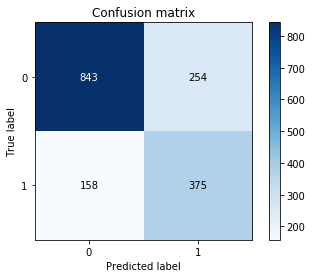

In [5]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


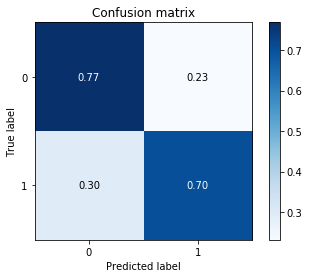

In [6]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

### Accuracy

In [7]:
clf.score(X_test, y_test)

0.747239263803681

### Precision

In [8]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### Recall

In [9]:
recall_score(y_test,y_pred)

0.5961844197138315

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

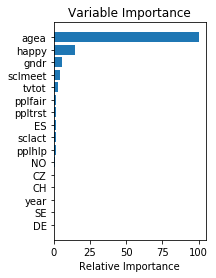

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

## Improve this gradient boost model

In [11]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


partner    1.000000
sclmeet    0.162970
gndr       0.033984
year       0.018689
sclact     0.011405
idno      -0.014931
pplhlp    -0.022069
tvtot     -0.028816
pplfair   -0.034054
ppltrst   -0.034371
happy     -0.145061
agea      -0.256670
Name: partner, dtype: float64


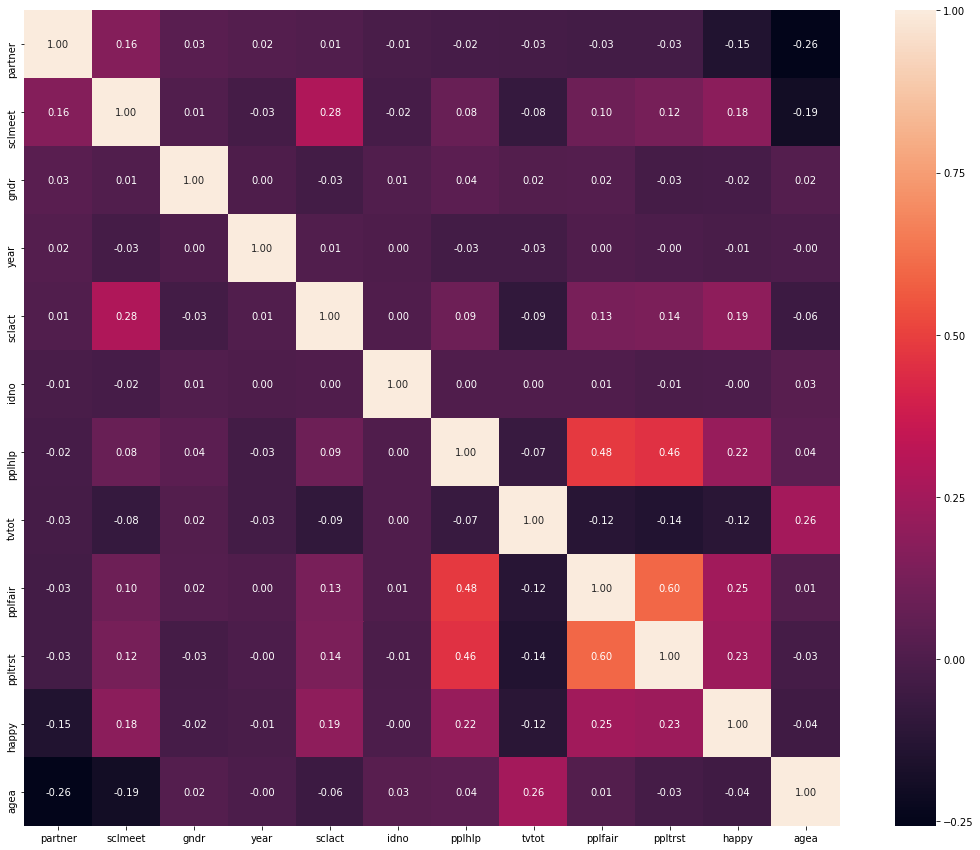

In [13]:
## Getting the top 30 most correlated variables with rating.

import seaborn as sns 
target = 'partner'
no_cols = 13
corrmat = df.corr()
print (corrmat.nlargest(no_cols, target)[target])

cols = corrmat.nlargest(no_cols, target)[target].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(20,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We see that the sclmeet, gndr and year have the highest correlations with partner. Let's create variables that contains interactions and summations of those variables and execute them in our model.

In [14]:
new_df = df.copy()

In [15]:
means = df[['ppltrst', 'pplfair', 'pplhlp']].mean(axis=0)
stds = df[['ppltrst', 'pplfair', 'pplhlp']].std(axis=0)
new_df['pp_all'] = ((df[['ppltrst', 'pplfair', 'pplhlp']] - means) / stds).mean(axis=1)
new_df["sum_age_yr"] = df["year"] + df["agea"]
new_df.drop(columns=['ppltrst', 'pplfair', 'pplhlp','agea'], inplace =True)

In [16]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = new_df['partner'] - 1
X = new_df.drop(['partner', 'cntry', 'idno'],1)

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(new_df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [17]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

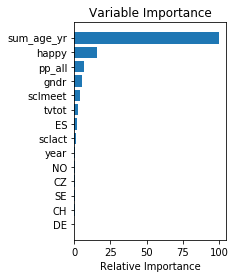

In [18]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [19]:
# Let's try improving the model by increasing n_estimator, max_depth and loss to exponential from deviance
params_new = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'exponential'}

# Initialize and fit the model.
clf_new = ensemble.GradientBoostingClassifier(**params_new)
clf_new.fit(X_train, y_train)

predict_train_new = clf_new.predict(X_train)
predict_test_new = clf_new.predict(X_test)

In [20]:
# Accuracy tables
table_train_new = pd.crosstab(y_train, predict_train_new, margins=True)
table_test_new = pd.crosstab(y_test, predict_test_new, margins=True)

train_tI_errors_new = table_train_new.loc[0.0,1.0] / table_train_new.loc['All','All']
train_tII_errors_new = table_train_new.loc[1.0,0.0] / table_train_new.loc['All','All']

test_tI_errors_new = table_test_new.loc[0.0,1.0] / table_test_new.loc['All','All']
test_tII_errors_new = table_test_new.loc[1.0,0.0] / table_test_new.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_new, train_tII_errors_new, test_tI_errors_new, test_tII_errors_new))

Training set accuracy:
Percent Type I errors: 0.0328696126568467
Percent Type II errors: 0.1351609383524277

Test set accuracy:
Percent Type I errors: 0.08220858895705521
Percent Type II errors: 0.16809815950920245


In [21]:
clf_new.score(X_test, y_test)

# y_pred_new = clf_new.predict(X_test)
# precision_score(y_test,y_pred_new)

# recall_score(y_test,y_pred_new)

0.7496932515337423